In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [4]:
train_images_path = '/home/munz/school/big_data/data/train_images'
images = os.listdir(train_images_path)
total_images = 0
for folder in images:
    total_images += len(os.listdir(os.path.join(train_images_path, folder)))

print(f'number of hotels: {len(images)}')
print(f'Number of total images: {total_images}')
print('average number of images per hotel: ', total_images/len(images))

number of hotels: 88
Number of total images: 97554
average number of images per hotel:  1108.5681818181818


In [62]:
# load df
df_path = '/home/munz/school/big_data/data/train.csv'
df = pd.read_csv(df_path)

# remove hotels that are not a part of a chain
df = df[df['chain'] != 0]

# group by hotel id and count number of images
df_grouped = df.groupby('hotel_id').agg({'image': 'count', 'chain': 'first'}).reset_index()
df_grouped = df_grouped.sort_values(by='image', ascending=False)
top_100_hotel_ids = df_grouped['hotel_id'].values[:100]
top_100_df = df[df['hotel_id'].isin(top_100_hotel_ids)]

In [66]:
unique_chains = top_100_df['chain'].unique()
num_images = len(top_100_df)

print(f'number of hotels in top 100: {len(top_100_hotel_ids)}')
print(f'number of unique chains in top 100: {len(unique_chains)}')
print(f'number of images in top 100: {num_images}')

number of hotels in top 100: 100
number of unique chains in top 100: 21
number of images in top 100: 7605


In [73]:
df = top_100_df

In [74]:
hotel_images = {}
for idx, row in tqdm(df.iterrows(), total=len(df)):
    hotel_id = row['hotel_id']
    if hotel_id not in hotel_images:
        hotel_images[hotel_id] = 1
    else:
        hotel_images[hotel_id] += 1

100%|██████████| 7605/7605 [00:00<00:00, 32800.68it/s]


In [75]:
chain_images = {}
for idx, row in tqdm(df.iterrows(), total=len(df)):
    chain_id = row['chain']
    if chain_id not in chain_images:
        chain_images[chain_id] = 1
    else:
        chain_images[chain_id] += 1

100%|██████████| 7605/7605 [00:00<00:00, 32566.33it/s]


In [76]:
max_chain = max(chain_images, key=chain_images.get)
min_chain = min(chain_images, key=chain_images.get)
print(f'chain with most images: {max_chain} with {chain_images[max_chain]} images')
print(f'chain with least images: {min_chain} with {chain_images[min_chain]} images')

chain with most images: 4 with 1543 images
chain with least images: 44 with 70 images


In [94]:
num_images_by_hotel = list(hotel_images.values())
num_images_by_chain = list(chain_images.values())

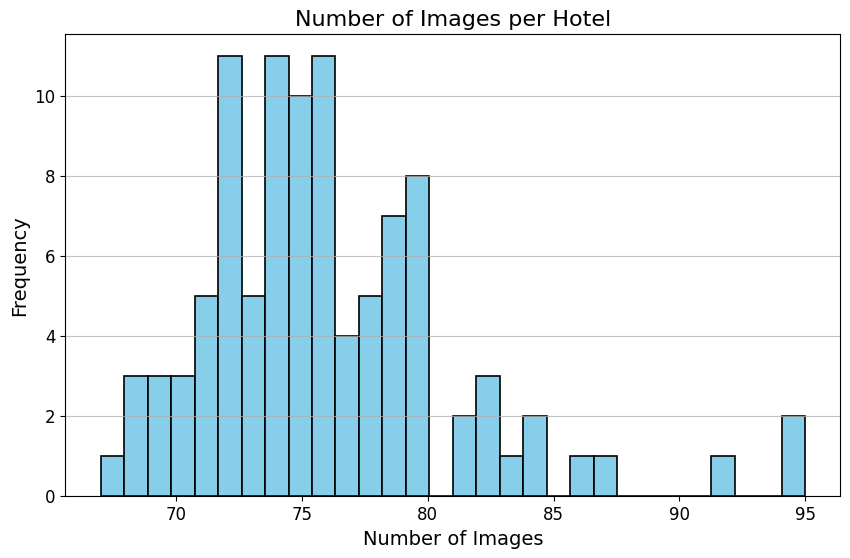

In [96]:
plt.figure(figsize=(10, 6))
plt.hist(num_images_by_hotel, bins=30, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title("Number of Images per Hotel", fontsize=16)
plt.xlabel("Number of Images", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [101]:
len(set(num_images_by_chain))

20

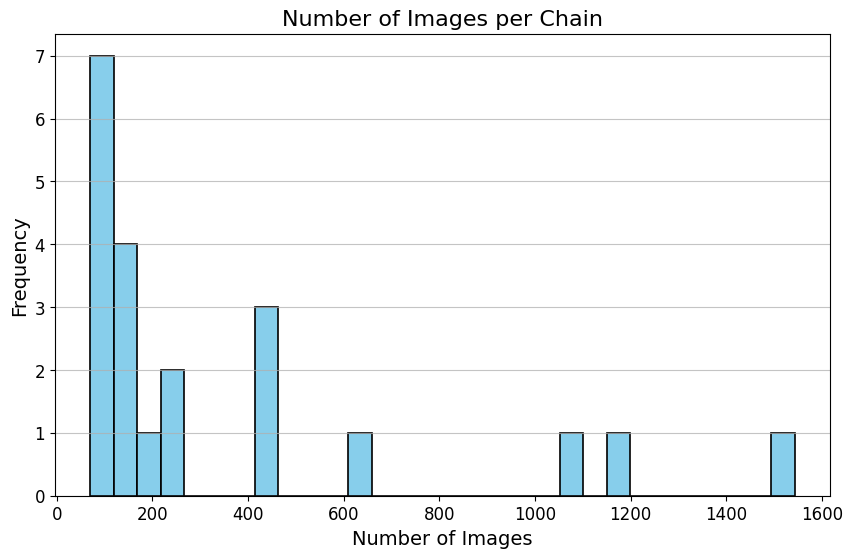

In [105]:
plt.figure(figsize=(10, 6))
plt.hist(num_images_by_chain, bins=30, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title("Number of Images per Chain", fontsize=16)
plt.xlabel("Number of Images", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


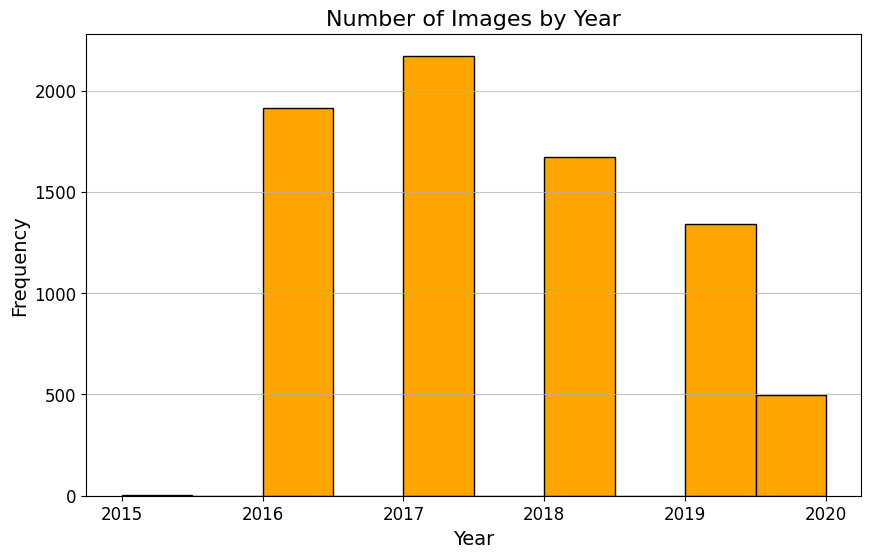

In [109]:
# create histogram from timestamp column
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['year'], bins=10, color='orange', edgecolor='black')
plt.title("Number of Images by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()